# Regression Model

### Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

sb.set()

### Getting Data

In [9]:
stocks = ["GOOG", "SPY"]
start = dt.date.today() - dt.timedelta(365)
end = dt.date.today()

data = yf.download(stocks, start=start, end=end)["Close"]
data.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,GOOG,SPY
Date,,
2023-07-11,117.709999,442.459991
2023-07-12,119.620003,446.019989
2023-07-13,124.830002,449.559998
2023-07-14,125.699997,449.279999
2023-07-17,125.059998,450.839996


### Calculating instantaneous rate of returns

In [11]:
returns = np.log(data).diff()
data.head()

Ticker,GOOG,SPY
Date,,
2023-07-11,117.709999,442.459991
2023-07-12,119.620003,446.019989
2023-07-13,124.830002,449.559998
2023-07-14,125.699997,449.279999
2023-07-17,125.059998,450.839996


In [22]:
sample = returns.sample(110).corr()
sample

Ticker,GOOG,SPY
Ticker,,
GOOG,1.00000,0.60543
SPY,0.60543,1.00000


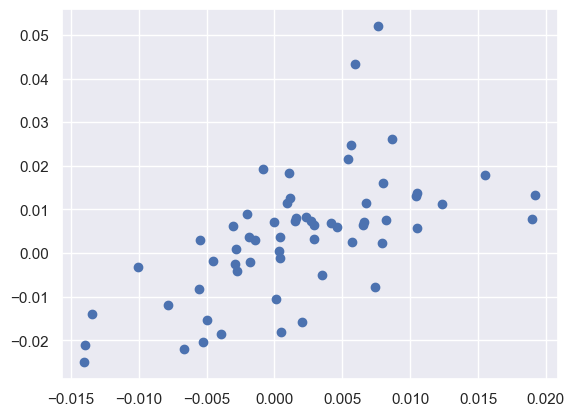

In [27]:
sample = returns.sample(60)
plt.scatter(x=sample['SPY'], y=sample['GOOG']);

In [29]:
reg = np.polyfit(sample['SPY'], sample['GOOG'], deg = 1)
reg

array([1.24813952, 0.00162028])

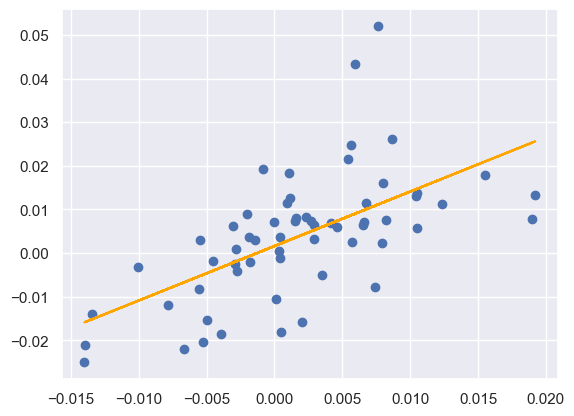

In [31]:
trend = np.polyval(reg, sample['SPY'])
plt.scatter(sample['SPY'], sample['GOOG'])
plt.plot(sample["SPY"], trend, 'orange')

### Regresssion Technical Indicator to predict future price

In [33]:
data = pd.DataFrame(yf.download(['SPY'], start=start, end=end)["Close"])
time = np.arange(1, len(data) + 1)
data['time'] = time
data = data[['time', 'Close']]
data = round(data,2)
data.tail()

[*********************100%%**********************]  1 of 1 completed


,time,Close
Date,,
2024-07-02,247,549.01
2024-07-03,248,551.46
2024-07-05,249,554.64
2024-07-08,250,555.28
2024-07-09,251,555.82


### Slope and y-Intercept

In [34]:
reg = np.polyfit(data['time'], data["Close"], deg=1)
reg

array([  0.48646825, 418.92037865])

### Storing predicted values

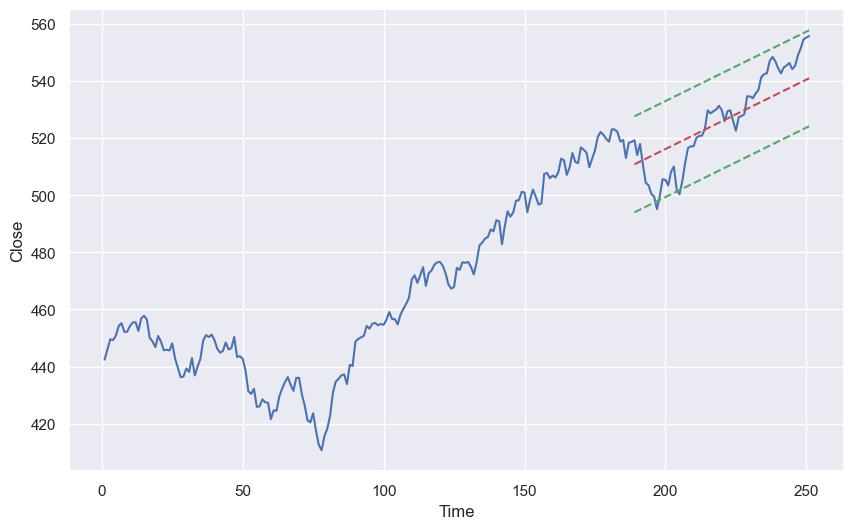

In [39]:
trend = np.polyval(reg, data['time'][-63:])
std = data['Close'][-63:].std()
plt.figure(figsize=(10,6))
plt.xlabel("Time")
plt.ylabel("Close")
plt.plot(data['time'], data['Close'], label = "S&P500")
plt.plot(data['time'][-63:], trend, 'r--')
plt.plot(data['time'][-63:], trend - std, 'g--')
plt.plot(data['time'][-63:], trend + std, 'g--');

### Predicting Price on specific day (Day 260 in this example)

In [43]:
predict = np.poly1d(reg)
predict(260)

545.4021243483214